# Exploration and Species Prediction of Iris Data Set

#### This notebook explores the iris flower dataset and creates several predictive models to assign a species to unlabled data.

In [1]:
# Enable Inline Plotting In the Notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd

## Data

The Iris flower dataset is the classic example machine learning. It contains 150 observations of 3 distinct species of Iris flower. Each observation is described by the flower's
1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width
5. Species

The data are provided in a csv file in the following format.

--------------------------------- <br />
---------- iris.dat.txt --------- <br />
Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species <br />
5.1,3.5,1.4,0.2,Iris-setosa <br />
4.9,3.0,1.4,0.2,Iris-setosa <br />
4.7,3.2,1.3,0.2,Iris-setosa <br />
---------- iris.dat.txt --------- <br />
---------------------------------- <br />

## Exploration

In [2]:
# Read Iris Data from CSV into Pandas Dataframe
df = pd.read_csv("./iris.data.txt")
# Display Example Records
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Column Oriented Descriptive Statistics
df.describe().round(1)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


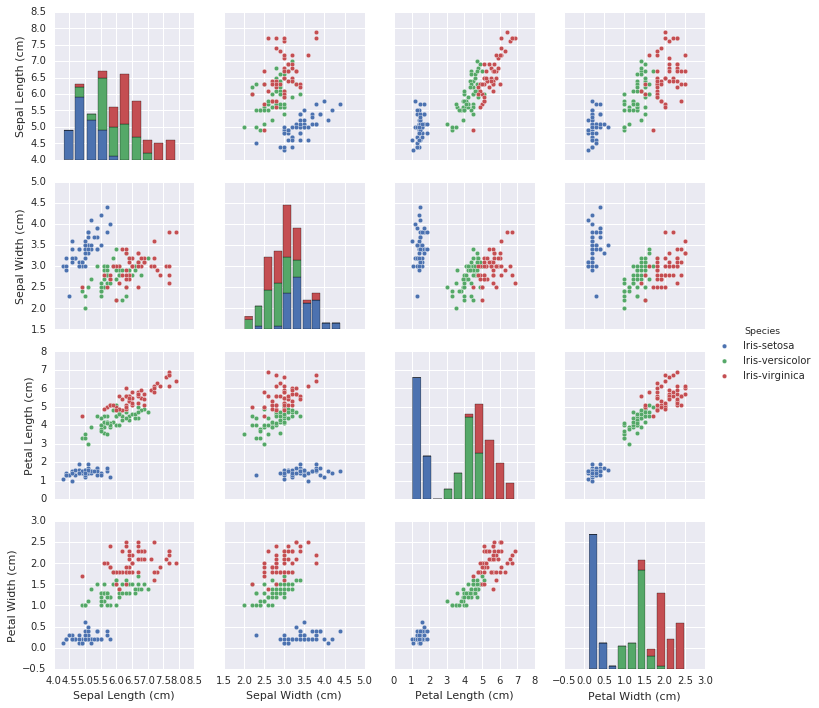

In [4]:
# Pairwise Feature Comparison
sb.pairplot(df, hue = "Species", size = 2.5)

# Predictive Modeling

In [5]:
# Separate independant and dependant variables
target_column = 'Species'
X = df[[col for col in df.columns if col not in [target_column]]]
y = df[target_column]

In [6]:
# Separate training and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
# Scale numeric data to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sc, X_test_sc = map(scaler.transform, [X_train, X_test])

### Simple KNN or K-Nearest Neighbors

KNN assigns a class (species) to an observation by allowing the k (parameter) observations closest to the observation to vote. The class with the highest number of votes wins.

In [8]:
# Fit KNN model on training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
# Calculate accuracy in and out-of-sample
knn_is_score = knn.score(X_train_sc, y_train)
knn_os_score = knn.score(X_test_sc, y_test)
print('KNN Results')
print('In-sample mean accuracy \t %.2f' % knn_is_score)
print('Out-of-sample mean accuracy \t %.2f' % knn_os_score)

KNN Results
In-sample mean accuracy 	 0.97
Out-of-sample mean accuracy 	 0.98


### Gradient Boosted Decision Trees

Gradient boosting relies of an ensemble of weak learners (decision trees) and iteratively fits additional week learners on the residuals of previous learners to improve fitness of an arbitrary differentiable loss function.

In [17]:
# Fit XGB model on training data
import xgboost
xgb = xgboost.XGBClassifier(max_depth = 3, nthread = -1)
xgb = xgb.fit(X_train_sc, y_train)
xgb

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [19]:
# Calculate accuracy in and out-of-sample
xgb_is_score = xgb.score(X_train_sc, y_train)
xgb_os_score = xgb.score(X_test_sc, y_test)
print('Gradient Boosted Forest Results')
print('In-sample mean accuracy \t %.2f' % xgb_is_score)
print('Out-of-sample mean accuracy \t %.2f' % xgb_os_score)

Gradient Boosted Forest Results
In-sample mean accuracy 	 1.00
Out-of-sample mean accuracy 	 0.98


TODO:<br />

Compare and contrast to T2 data

key points:<br />
    1. parameterization
    2. knowing which model to use
    3. features >> data set ?
    4. noisy labels

